# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [2]:
import pandas as pd

tabela = pd.read_csv(r"C:\Users\marce\OneDrive\Documentos\Python Scripts\Curso Python\Aula 3 Python\advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

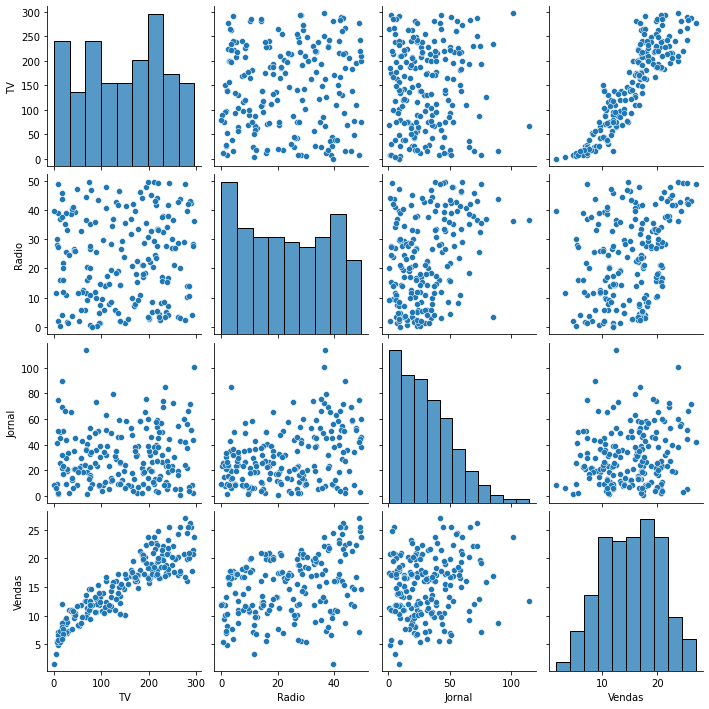

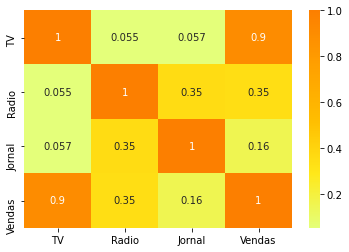

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(tabela)
plt.show()

sns.heatmap(tabela.corr(), cmap = 'Wistia', annot=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [14]:
from sklearn.model_selection import train_test_split

x= tabela.drop("Vendas",axis=1)
y= tabela["Vendas"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size =0.3)


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear = LinearRegression()
randomforest = RandomForestRegressor()

linear.fit(x_treino, y_treino)
randomforest.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [18]:
from sklearn import metrics

teste_linear = linear.predict(x_teste)
teste_random = randomforest.predict(x_teste)

r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_random = metrics.r2_score(y_teste, teste_random)
print(r2_linear, r2_random)

erro_linear = metrics.mean_squared_error(y_teste, teste_linear)
erro_random = metrics.mean_squared_error(y_teste, teste_random)
print(erro_linear, erro_random)

0.9125972798961376 0.9189471368481753
1.7380574731800356 1.6117866166666623


#### Visualização Gráfica das Previsões

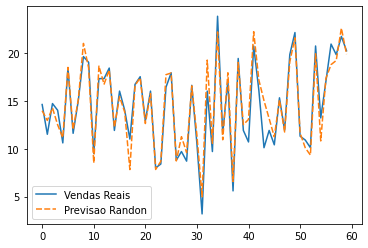

In [26]:
tabela_comparacao = pd.DataFrame()
tabela_comparacao["Vendas Reais"] = y_teste
tabela_comparacao["Previsao Randon"] = teste_random
tabela_comparacao = tabela_comparacao.reset_index(drop=True)

sns.lineplot(data=tabela_comparacao)
plt.show()

#### Qual a importância de cada variável para as vendas?

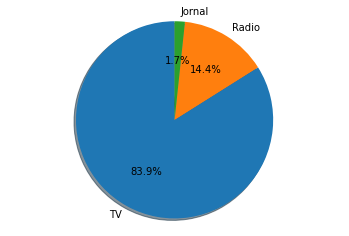

In [34]:
import matplotlib.pyplot as plt

labels = "TV", "Radio", "Jornal"
sizes = randomforest.feature_importances_

figl, axl = plt.subplots()

axl.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, normalize=True)

axl.axis('equal')
plt.show()


#### Será que estamos investindo certo?

Radio      4652.8
Jornal     6110.8
TV        29408.5
dtype: float64


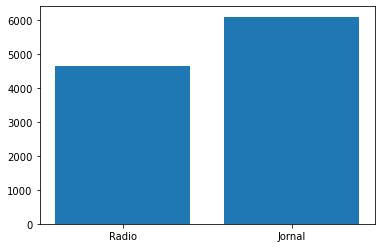

In [67]:
print(tabela[['Radio', 'Jornal', 'TV']].sum())
grupos = ['Radio', 'Jornal']
valores = [4652.8, 6110.8]
plt.bar(grupos, valores)
plt.show()